In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
df = pd.read_csv('data/title_budgets_ratings_v2.csv')

In [33]:
df = df.rename(columns = {'profit':'profit_multiple'})

In [34]:
df.head()

,Unnamed: 0,id,release_date,movie,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,year,month,production_budget_2,domestic_gross_2,worldwide_gross_2,genres2,profit_multiple
2,2,3,2019-06-07,Dark Phoenix,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",6.0,24451,2019,6,350000000,42762350,149762350,"['Action', 'Adventure', 'Sci-Fi']",-0.572108
3,3,4,2015-05-01,Avengers: Age of Ultron,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594,2015,5,330600000,459005868,1403013963,"['Action', 'Adventure', 'Sci-Fi']",3.243841
4,4,7,2018-04-27,Avengers: Infinity War,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926,2018,4,300000000,678815482,2048134200,"['Action', 'Adventure', 'Sci-Fi']",5.827114
5,5,9,2017-11-17,Justice League,tt0974015,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy",6.5,329135,2017,11,300000000,229024295,655945209,"['Action', 'Adventure', 'Fantasy']",1.186484
6,6,10,2015-11-06,Spectre,tt2379713,Spectre,Spectre,2015,148.0,"Action,Adventure,Thriller",6.8,352504,2015,11,300000000,200074175,879620923,"['Action', 'Adventure', 'Thriller']",1.932070


In [4]:
df.shape

(2943, 19)

In [82]:
df.isna().sum()

Unnamed: 0              0
id                      0
release_date            0
movie                   0
tconst                  0
primary_title           0
original_title          0
start_year              0
runtime_minutes        26
genres                  5
averagerating           0
numvotes                0
year                    0
month                   0
production_budget_2     0
domestic_gross_2        0
worldwide_gross_2       0
genres2                 5
profit_multiple         0
genres3                 5
dtype: int64

We won't drop columns that have NaNs in runtime_minutes because some big productions, such as Titanic, does not have a value either! 

In [6]:
df.loc[df['movie']== 'Titanic']

,Unnamed: 0,id,release_date,movie,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,year,month,production_budget_2,domestic_gross_2,worldwide_gross_2,genres2,profit
32,32,43,1997-12-19,Titanic,tt2495766,Titanic,Titanic,2012,NaN,Adventure,6.2,20,1997,12,200000000,659363944,2208208395,['Adventure'],10.041042


Is profit correlated with reviews? Scatter plot of average rating and profit (box office - budget)/budget. This analysis will help guide us to go after good revi
Steps:
- drop the 282 productions where worldwide gross revenue is zero.
- drop the 7 productions where profit multiple is over 100. (budget numbers artificially small)
- limit analysis to last 5 years (year > = 2015). That leaves us with 898 movies to analyze. 
- fidn the rows where start_year doesn't match release_date year. Drop the rows that are more than 1 year apart. 
- make the scatterplot

In [8]:
df[df['worldwide_gross_2'] == 0]

,Unnamed: 0,id,release_date,movie,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,year,month,production_budget_2,domestic_gross_2,worldwide_gross_2,genres2,profit
318,318,80,2017-12-13,Bright,tt5519340,Bright,Bright,2017,117.0,"Action,Crime,Fantasy",6.4,147834,2017,12,90000000,0,0,"['Action', 'Crime', 'Fantasy']",-1.0
519,519,52,2015-12-11,The Ridiculous 6,tt2479478,The Ridiculous 6,The Ridiculous 6,2015,119.0,"Comedy,Western",4.8,38694,2015,12,60000000,0,0,"['Comedy', 'Western']",-1.0
520,520,53,2019-11-08,Midway,tt2428672,Midway,Midway,2013,85.0,"Documentary,Family",7.3,43,2019,11,59500000,0,0,"['Documentary', 'Family']",-1.0
1035,1035,30,2019-09-30,Unhinged,tt5940342,Unhinged,Unhinged,2017,93.0,Horror,4.2,512,2019,9,29000000,0,0,['Horror'],-1.0
1094,1094,56,2015-04-24,The Face of an Angel,tt2967008,The Face of an Angel,The Face of an Angel,2014,101.0,"Crime,Drama",4.6,4211,2015,4,26000000,0,0,"['Crime', 'Drama']",-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2936,2936,56,2013-01-04,All Superheroes Must Die,tt1836212,All Superheroes Must Die,All Superheroes Must Die,2011,78.0,"Sci-Fi,Thriller",4.0,1977,2013,1,20000,0,0,"['Sci-Fi', 'Thriller']",-1.0
2937,2937,59,2011-11-25,The Ridges,tt1781935,The Ridges,The Ridges,2011,89.0,"Drama,Horror,Thriller",2.9,127,2011,11,17300,0,0,"['Drama', 'Horror', 'Thriller']",-1.0
2938,2938,62,2014-12-31,Stories of Our Lives,tt3973612,Stories of Our Lives,Stories of Our Lives,2014,60.0,Drama,7.5,85,2014,12,15000,0,0,['Drama'],-1.0
2941,2941,78,2018-12-31,Red 11,tt7837402,Red 11,Red 11,2019,77.0,"Horror,Sci-Fi,Thriller",5.6,43,2018,12,7000,0,0,"['Horror', 'Sci-Fi', 'Thriller']",-1.0


In [11]:
df = df[df['worldwide_gross_2']!=0]

In [35]:
df[df['profit_multiple']>100]

,Unnamed: 0,id,release_date,movie,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,year,month,production_budget_2,domestic_gross_2,worldwide_gross_2,genres2,profit_multiple


In [19]:
df = df[df['profit_multiple']<= 100]

In [27]:
df.shape

(2654, 19)

In [26]:
df[df['year'] >= 2015].shape

(898, 19)

In [28]:
df = df[df['year'] >= 2015]

In [31]:
df[df['start_year'] != df['year']]

,Unnamed: 0,id,release_date,movie,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,year,month,production_budget_2,domestic_gross_2,worldwide_gross_2,genres2,profit
76,76,97,2016-04-15,The Jungle Book,tt2226178,The Jungle Book,The Jungle Book,2014,64.0,Animation,7.0,59,2016,4,175000000,364001123,962854547,['Animation'],4.502026
78,78,98,2015-06-19,Inside Out,tt1640486,Inside Out,Inside Out,2011,93.0,"Crime,Drama",4.6,1566,2015,6,175000000,356461711,854235992,"['Crime', 'Drama']",3.881349
79,79,98,2015-06-19,Inside Out,tt2071483,Inside Out,Inside Out,2011,59.0,Family,7.3,15,2015,6,175000000,356461711,854235992,['Family'],3.881349
81,81,98,2015-06-19,Inside Out,tt2608638,Inside Out,Inside Out,2013,75.0,"Biography,Documentary,History",7.5,60,2015,6,175000000,356461711,854235992,"['Biography', 'Documentary', 'History']",3.881349
98,98,23,2015-05-22,Tomorrowland,tt7728220,Tomorrowland,Tomorrowland,2017,70.0,Documentary,6.3,7,2015,5,170000000,93436322,206627518,['Documentary'],0.215456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2878,2878,51,2016-06-03,The Fits,tt4238858,The Fits,The Fits,2015,72.0,"Drama,Music",6.7,4053,2016,6,170000,166425,169242,"['Drama', 'Music']",-0.004459
2881,2881,61,2015-08-21,Top Spin,tt4219836,Top Spin,Top Spin,2014,80.0,Documentary,6.9,513,2015,8,150000,5858,5858,['Documentary'],-0.960947
2905,2905,2,2015-07-17,Dawn of the Crescent Moon,tt3157318,Dawn of the Crescent Moon,Dawn of the Crescent Moon,2014,95.0,"Drama,Sci-Fi,Thriller",5.1,42,2015,7,75000,8799,8799,"['Drama', 'Sci-Fi', 'Thriller']",-0.882680
2926,2926,38,2016-03-18,Krisha,tt4266638,Krisha,Krisha,2015,83.0,Drama,7.2,5917,2016,3,30000,144822,144822,['Drama'],3.827400


In [42]:
df.head()

,Unnamed: 0,id,release_date,movie,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,year,month,production_budget_2,domestic_gross_2,worldwide_gross_2,genres2,profit_multiple
2,2,3,2019-06-07,Dark Phoenix,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",6.0,24451,2019,6,350000000,42762350,149762350,"['Action', 'Adventure', 'Sci-Fi']",-0.572108
3,3,4,2015-05-01,Avengers: Age of Ultron,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594,2015,5,330600000,459005868,1403013963,"['Action', 'Adventure', 'Sci-Fi']",3.243841
4,4,7,2018-04-27,Avengers: Infinity War,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926,2018,4,300000000,678815482,2048134200,"['Action', 'Adventure', 'Sci-Fi']",5.827114
5,5,9,2017-11-17,Justice League,tt0974015,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy",6.5,329135,2017,11,300000000,229024295,655945209,"['Action', 'Adventure', 'Fantasy']",1.186484
6,6,10,2015-11-06,Spectre,tt2379713,Spectre,Spectre,2015,148.0,"Action,Adventure,Thriller",6.8,352504,2015,11,300000000,200074175,879620923,"['Action', 'Adventure', 'Thriller']",1.932070


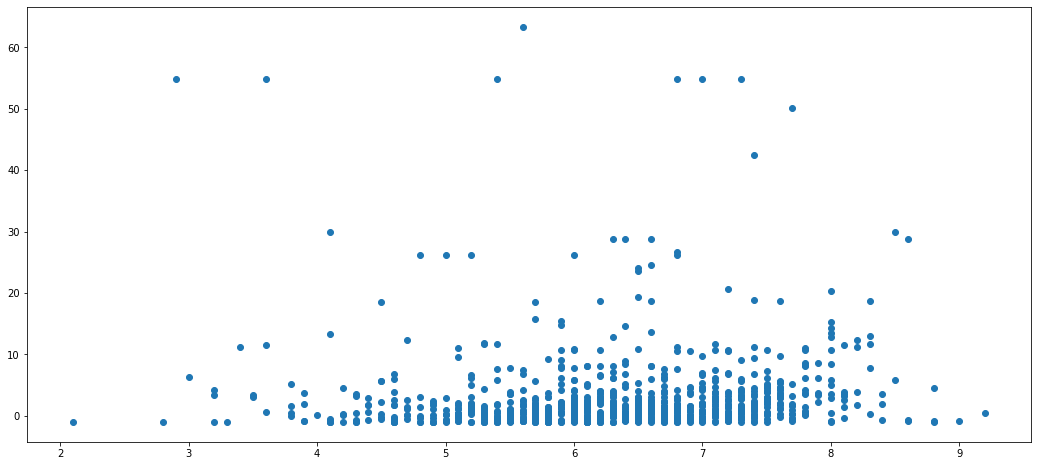

In [32]:
plt.figure(figsize = (18,8))
plt.scatter(df['averagerating'], df['profit_multiple'])
plt.show()

In [36]:
df[df['profit_multiple'] >=30]

,Unnamed: 0,id,release_date,movie,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,year,month,production_budget_2,domestic_gross_2,worldwide_gross_2,genres2,profit_multiple
1895,1895,56,2016-12-21,Dangal,tt5074352,Dangal,Dangal,2016,161.0,"Action,Biography,Drama",8.5,123638,2016,12,9500000,12391761,294654618,"['Action', 'Biography', 'Drama']",30.016276
1896,1896,56,2016-12-21,Dangal,tt5911540,Dangal,Dangal,2013,NaN,Action,4.1,20,2016,12,9500000,12391761,294654618,['Action'],30.016276
2120,2120,49,2017-02-24,Get Out,tt5052448,Get Out,Get Out,2017,104.0,"Horror,Mystery,Thriller",7.7,400474,2017,2,5000000,176040665,255367951,"['Horror', 'Mystery', 'Thriller']",50.073590
2121,2121,50,2017-01-20,Split,tt2660118,Split,Split,2016,90.0,"Comedy,Romance,Sport",2.9,557,2017,1,5000000,138141585,278964806,"['Comedy', 'Romance', 'Sport']",54.792961
2122,2122,50,2017-01-20,Split,tt3315656,Split,Split,2016,127.0,"Drama,Fantasy",3.6,380,2017,1,5000000,138141585,278964806,"['Drama', 'Fantasy']",54.792961
2123,2123,50,2017-01-20,Split,tt3604256,Split,Split,2016,NaN,Crime,6.8,5,2017,1,5000000,138141585,278964806,['Crime'],54.792961
2124,2124,50,2017-01-20,Split,tt4972582,Split,Split,2016,117.0,"Horror,Thriller",7.3,358543,2017,1,5000000,138141585,278964806,"['Horror', 'Thriller']",54.792961
2125,2125,50,2017-01-20,Split,tt5495666,Split,Split,2016,80.0,Drama,7.0,21,2017,1,5000000,138141585,278964806,['Drama'],54.792961
2126,2126,50,2017-01-20,Split,tt6147768,Split,Split,2016,123.0,"Action,Drama,Sport",5.4,189,2017,1,5000000,138141585,278964806,"['Action', 'Drama', 'Sport']",54.792961
2575,2575,64,2016-10-21,Moonlight,tt4975722,Moonlight,Moonlight,2016,111.0,Drama,7.4,227964,2016,10,1500000,27854931,65245512,['Drama'],42.497008


In [67]:
df['genres3'] = list(df['genres'].str.split(','))

In [68]:
df.head()

,Unnamed: 0,id,release_date,movie,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,year,month,production_budget_2,domestic_gross_2,worldwide_gross_2,genres2,profit_multiple,genres3
2,2,3,2019-06-07,Dark Phoenix,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",6.0,24451,2019,6,350000000,42762350,149762350,"['Action', 'Adventure', 'Sci-Fi']",-0.572108,"[Action, Adventure, Sci-Fi]"
3,3,4,2015-05-01,Avengers: Age of Ultron,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594,2015,5,330600000,459005868,1403013963,"['Action', 'Adventure', 'Sci-Fi']",3.243841,"[Action, Adventure, Sci-Fi]"
4,4,7,2018-04-27,Avengers: Infinity War,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926,2018,4,300000000,678815482,2048134200,"['Action', 'Adventure', 'Sci-Fi']",5.827114,"[Action, Adventure, Sci-Fi]"
5,5,9,2017-11-17,Justice League,tt0974015,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy",6.5,329135,2017,11,300000000,229024295,655945209,"['Action', 'Adventure', 'Fantasy']",1.186484,"[Action, Adventure, Fantasy]"
6,6,10,2015-11-06,Spectre,tt2379713,Spectre,Spectre,2015,148.0,"Action,Adventure,Thriller",6.8,352504,2015,11,300000000,200074175,879620923,"['Action', 'Adventure', 'Thriller']",1.932070,"[Action, Adventure, Thriller]"


In [69]:
type(df['genres3'].iloc[0])

list

In [84]:
df['genres2'].iloc[0]

"['Action', 'Adventure', 'Sci-Fi']"

In [85]:
df['genres3'].iloc[0]

['Action', 'Adventure', 'Sci-Fi']

In [59]:
len((df['genres2'].iloc[0]))

33

In [48]:
len(range(len(df)))

898

In [79]:
df.iloc[126]

Unnamed: 0                    272
id                              9
release_date           2018-11-21
movie                  Robin Hood
tconst                  tt6858500
primary_title          Robin Hood
original_title         Robin Hood
start_year                   2018
runtime_minutes               NaN
genres                        NaN
averagerating                 7.6
numvotes                        5
year                         2018
month                          11
production_budget_2      99000000
domestic_gross_2         30824628
worldwide_gross_2        84747441
genres2                       NaN
profit_multiple         -0.143965
genres3                       NaN
Name: 272, dtype: object

In [88]:
df = df.dropna(subset = ['genres3'])

In [126]:
df.shape

(893, 20)

In [109]:
def get_genres(df, genre):
    revenue_list = []
    profit_list = []
    for i in range(len(df)):
        if genre in df['genres3'].iloc[i]:
            revenue_list.append(df['worldwide_gross_2'].iloc[i])
            profit_list.append(df['profit_multiple'].iloc[i])
    avg_revenue = sum(revenue_list)/len(revenue_list)
    avg_profit = sum(profit_list)/len(profit_list)
    return avg_revenue, avg_profit, genre

In [110]:
avg_revenue, avg_profit, genre = get_genres(df, 'Action')

In [111]:
test = list(get_genres(df,'Action'))

In [113]:
test

[241921848.05084747, 2.2302443354605734, 'Action']

In [94]:
#get a list of unique genres
genres_unique =[]
for i in range(len(df)):
    for n in range(len(df['genres3'].iloc[i])):
        if df['genres3'].iloc[i][n] not in genres_unique:
            genres_unique.append(df['genres3'].iloc[i][n])
genres_unique
    

['Action',
 'Adventure',
 'Sci-Fi',
 'Fantasy',
 'Thriller',
 'Crime',
 'Animation',
 'Comedy',
 'Family',
 'Drama',
 'Mystery',
 'Horror',
 'Biography',
 'Documentary',
 'History',
 'Romance',
 'Musical',
 'Sport',
 'Western',
 'Music',
 'War',
 'News']

In [95]:
len(genres_unique)

22

Creating a dataframe of genres and their average revenue & profit multiple: 

In [114]:
genres_list = []
for i in genres_unique:
    genres_list.append(list(get_genres(df,i)))
genres_list 
    

[[241921848.05084747, 2.2302443354605734, 'Action'],
 [323322969.07216495, 2.115218530023809, 'Adventure'],
 [355000974.2714286, 2.879355870554625, 'Sci-Fi'],
 [264263419.546875, 3.113715085606054, 'Fantasy'],
 [125164371.18978103, 4.847544621423643, 'Thriller'],
 [89994117.23275863, 1.7706042466543896, 'Crime'],
 [337858031.89830506, 3.006316567485966, 'Animation'],
 [144097251.32142857, 2.6372082361384437, 'Comedy'],
 [268849877.71794873, 2.2017340568882964, 'Family'],
 [81178410.18913044, 2.916918404832795, 'Drama'],
 [70195556.36363636, 6.390790510237184, 'Mystery'],
 [86355778.83333333, 6.873705574977521, 'Horror'],
 [80709812.22680412, 2.028470402096577, 'Biography'],
 [97496667.51219513, 1.9744369540523512, 'Documentary'],
 [88367938.8, 1.320492891379748, 'History'],
 [86555189.79775281, 4.030718621303621, 'Romance'],
 [427036673.75, 3.5547735043695887, 'Musical'],
 [104092961.9090909, 5.961533395931048, 'Sport'],
 [83148250.5, -0.021655566666666626, 'Western'],
 [118500430.7037

In [116]:
df_genre = pd.DataFrame(genres_list, columns=['revenue', 'profit', 'genre'])

In [117]:
df_genre

,revenue,profit,genre
0,2.419218e+08,2.230244,Action
1,3.233230e+08,2.115219,Adventure
2,3.550010e+08,2.879356,Sci-Fi
3,2.642634e+08,3.113715,Fantasy
4,1.251644e+08,4.847545,Thriller
5,8.999412e+07,1.770604,Crime
6,3.378580e+08,3.006317,Animation
7,1.440973e+08,2.637208,Comedy
8,2.688499e+08,2.201734,Family
9,8.117841e+07,2.916918,Drama


In [121]:
df_genre_rev = df_genre.sort_values(by=['revenue'], ascending = False)

In [127]:
df_genre_rev

,revenue,profit,genre
16,4.270367e+08,3.554774,Musical
2,3.550010e+08,2.879356,Sci-Fi
6,3.378580e+08,3.006317,Animation
1,3.233230e+08,2.115219,Adventure
8,2.688499e+08,2.201734,Family
3,2.642634e+08,3.113715,Fantasy
0,2.419218e+08,2.230244,Action
7,1.440973e+08,2.637208,Comedy
4,1.251644e+08,4.847545,Thriller
19,1.185004e+08,3.308920,Music


In [122]:
df_genre_profit = df_genre.sort_values(by=['profit'], ascending = False)

<BarContainer object of 22 artists>

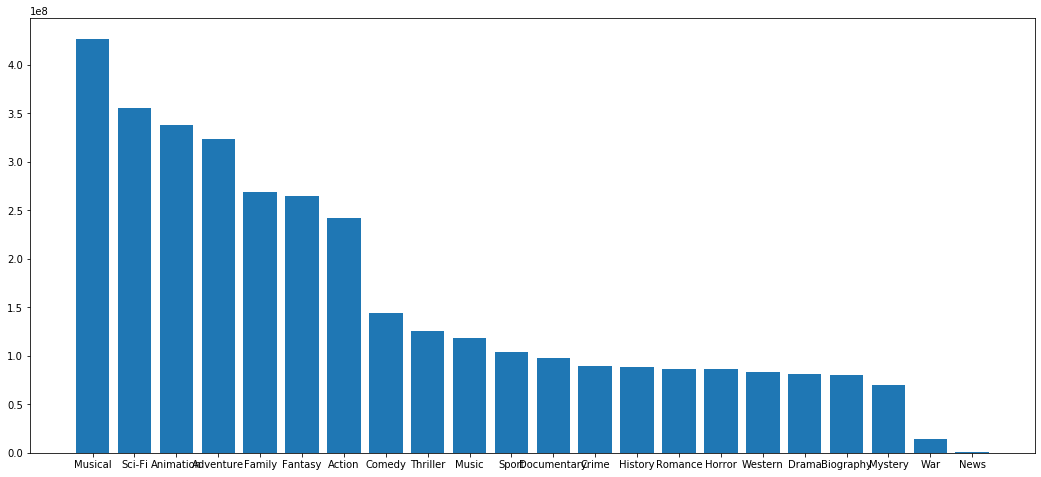

In [123]:
plt.figure(figsize = (18,8))
plt.bar(df_genre_rev['genre'],df_genre_rev['revenue'])

<BarContainer object of 22 artists>

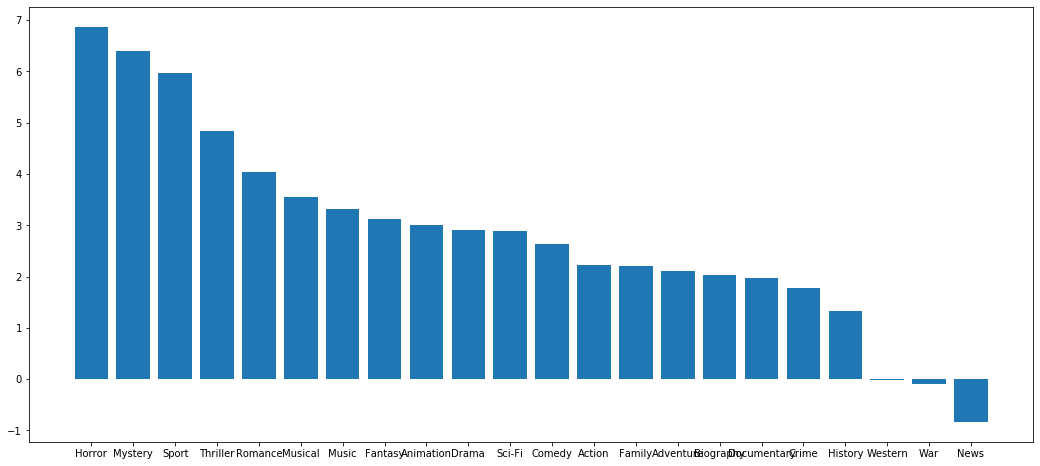

In [125]:
plt.figure(figsize = (18,8))
plt.bar(df_genre_profit['genre'],df_genre_profit['profit'])